## **$l_{2}$ loss function**

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

x_vals = np.array( [x[3] for x in iris.data] )
#x_vals = np.array( iris.data[:, 3] )
y_vals = np.array( iris.data[:, 0] )
print(x_vals.shape, y_vals.shape)

(150,) (150,)


In [0]:
learning_rate = 0.05
batch_size = 25

x_data = tf.placeholder( shape=[None, 1], dtype=tf.float32 )
y_target = tf.placeholder( shape=[None, 1], dtype=tf.float32 )

A = tf.Variable( tf.random_normal(shape=[1,1]) )
b = tf.Variable( tf.random_normal(shape=[1,1]) )

In [0]:
model_output = tf.add( tf.matmul(x_data, A), b )

loss = tf.reduce_mean( tf.square(y_target-model_output) )
init = tf.global_variables_initializer()
my_opt = tf.train.GradientDescentOptimizer( learning_rate )
train_step = my_opt.minimize( loss )

In [0]:
sess = tf.Session()
sess.run( init )

loss_vec = []
for i in range(100):
  rand_index = np.random.choice( len(x_vals), size=batch_size )
  rand_x = np.transpose( [x_vals[rand_index]] )
  rand_y = np.transpose( [y_vals[rand_index]] )
  
  sess.run( train_step, feed_dict={x_data:rand_x, y_target:rand_y} )
  temp_loss = sess.run( loss, feed_dict={x_data:rand_x, y_target:rand_y} )
  loss_vec.append( temp_loss )
  
  if (i+1)%20==0:
    print( 'Step #' + str(i+1) + ' A= ' + str(sess.run(A)) + ' b= ' + str(sess.run(b)) )
    print( 'Loss = ' + str(temp_loss) )

Step #20 A= [[1.8836489]] b= [[3.215425]]
Loss = 0.72846246
Step #40 A= [[1.5576568]] b= [[3.780362]]
Loss = 0.7688999
Step #60 A= [[1.3044345]] b= [[4.116529]]
Loss = 0.34990716
Step #80 A= [[1.219049]] b= [[4.3569207]]
Loss = 0.3148168
Step #100 A= [[1.068139]] b= [[4.472939]]
Loss = 0.25113237


In [0]:
[slope] = sess.run( A )
[y_intercept] = sess.run( b )

best_fit = []
for i in x_vals:
  best_fit.append( slope*i + y_intercept )

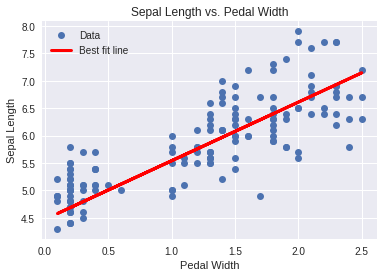

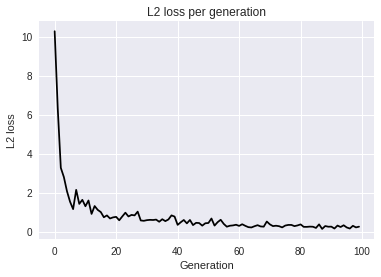

In [0]:
plt.plot( x_vals, y_vals, 'o', label='Data' )
plt.plot( x_vals, best_fit, 'r-', label='Best fit line', linewidth=3 )
plt.legend( loc='upper left' )
plt.title( 'Sepal Length vs. Pedal Width' )
plt.xlabel( 'Pedal Width' )
plt.ylabel( 'Sepal Length' )
plt.show()

plt.plot( loss_vec, 'k-' )
plt.title( 'L2 loss per generation' )
plt.xlabel( 'Generation' )
plt.ylabel( 'L2 loss' )
plt.show()

## **$l_{1}$ loss function**

Step #20 A= [[2.229744]] b= [[1.3220001]]
Loss = 1.8451173
Step #40 A= [[2.619344]] b= [[2.3620002]]
Loss = 1.2760969
Step #60 A= [[2.1341438]] b= [[2.8420005]]
Loss = 1.1341537
Step #80 A= [[1.8005443]] b= [[3.338001]]
Loss = 0.7244445
Step #100 A= [[1.5045444]] b= [[3.8580008]]
Loss = 0.58886486


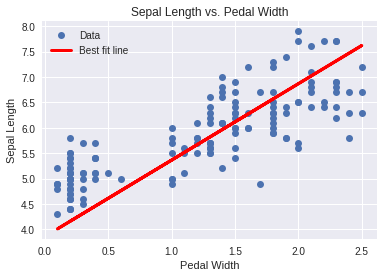

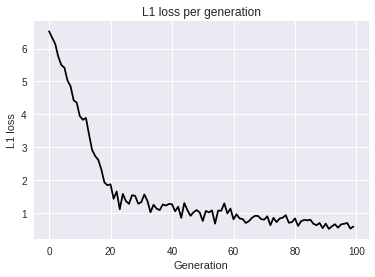

In [0]:
# l1 loss
model_output = tf.add( tf.matmul(x_data, A), b )

loss_l1 = tf.reduce_mean( tf.abs(y_target-model_output) ) # l1-norm
init = tf.global_variables_initializer()

my_opt_l1 = tf.train.GradientDescentOptimizer( learning_rate )
train_step_l1 = my_opt_l1.minimize( loss_l1 )

sess = tf.Session()
sess.run( init )

loss_vec = []
for i in range(100):
  rand_index = np.random.choice( len(x_vals), size=batch_size )
  rand_x = np.transpose( [x_vals[rand_index]] )
  rand_y = np.transpose( [y_vals[rand_index]] )
  
  sess.run( train_step_l1, feed_dict={x_data:rand_x, y_target:rand_y} )
  temp_loss_l1 = sess.run( loss_l1, feed_dict={x_data:rand_x, y_target:rand_y} )
  loss_vec.append( temp_loss_l1 )
  
  if (i+1)%20==0:
    print( 'Step #' + str(i+1) + ' A= ' + str(sess.run(A)) + ' b= ' + str(sess.run(b)) )
    print( 'Loss = ' + str(temp_loss_l1) )
    
[slope] = sess.run( A )
[y_intercept] = sess.run( b )

best_fit = []
for i in x_vals:
  best_fit.append( slope*i + y_intercept )    
  
plt.plot( x_vals, y_vals, 'o', label='Data' )
plt.plot( x_vals, best_fit, 'r-', label='Best fit line', linewidth=3 )
plt.legend( loc='upper left' )
plt.title( 'Sepal Length vs. Pedal Width' )
plt.xlabel( 'Pedal Width' )
plt.ylabel( 'Sepal Length' )
plt.show()

plt.plot( loss_vec, 'k-' )
plt.title( 'L1 loss per generation' )
plt.xlabel( 'Generation' )
plt.ylabel( 'L1 loss' )
plt.show()  